In [2]:
"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Python packages
"""

import numpy as np
import matplotlib.pyplot as plt

"""
Own packages
"""

import sys
sys.path.insert(0,'C:\\code\\python_for_the_financial_economist\\')

from codelib.visualization.layout import DefaultStyle, default_colors
DefaultStyle();

# Taylor approximation of zero coupon bond

Consider the zero-coupon bond with $T$ years to maturity and with the price 

$$
B_T = e^{-y_T T}
$$

where $y_T$ is the $T$-year zero-coupon yield with continuous compounding. 

The second order Taylor approximation around $y_T^*$ is given by 

\begin{align}
B_T \approx e^{-y_T^* T} - T e^{-y_T^* T} \Delta y_T + \frac{T^2}{2} e^{-y_T^* T} \Delta y_T
\end{align}

where $\Delta y_T = y_T - y_T^*$. 

Below, we plot the 1., 2. and 3. order Taylor approximations. 

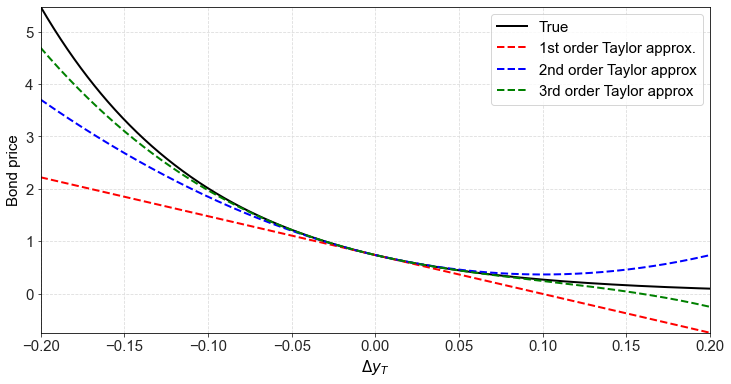

In [11]:
rate = 0.03
tenor = 10

delta_rates = np.linspace(-0.2, 0.2, 1000)

bond_prices = np.exp(-(rate + delta_rates) * tenor)
approx_bond_prices_1st = np.exp(-(rate) * tenor) - tenor*np.exp(-rate*tenor) * delta_rates
approx_bond_prices_2nd = np.exp(-(rate) * tenor) - tenor*np.exp(-rate*tenor) * delta_rates + 0.5 * tenor**2 * np.exp(-rate*tenor)*delta_rates**2
approx_bond_prices_3rd = np.exp(-(rate) * tenor) - tenor*np.exp(-rate*tenor) * delta_rates + 0.5 * tenor**2 * np.exp(-rate*tenor)*delta_rates**2 - 1 / 6 * tenor**3 * np.exp(-rate*tenor)*delta_rates**3

"""
Plotting
"""

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(delta_rates, bond_prices, color="black", label="True")
ax.plot(delta_rates, approx_bond_prices_1st, color="red", linestyle="--", label="1st order Taylor approx.")
ax.plot(delta_rates, approx_bond_prices_2nd, color="blue", linestyle="--", label="2nd order Taylor approx")
ax.plot(delta_rates, approx_bond_prices_3rd, color="green", linestyle="--", label="3rd order Taylor approx")
ax.legend()
ax.set_xlabel("$\\Delta y_T$")
ax.set_ylabel("Bond price");